# Pyxelate example notebook

In [1]:
# If set to True, example images in README.md will be overwritten!
SAVE_IMAGES = False

In [2]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from pyxelate import Pyx, Pal

In [4]:
# Display images in Jupyter Notebook

def plot(subplots=[], save_as=None, fig_h=9):
    """Plotting helper function"""
    fig, ax = plt.subplots(int(np.ceil(len(subplots) / 3)), 
                           min(3, len(subplots)), 
                           figsize=(18, fig_h))
    if len(subplots) == 1:
        ax = [ax]
    else:
        ax = ax.ravel()
    for i, subplot in enumerate(subplots):
        if isinstance(subplot, dict):
            ax[i].set_title(subplot["title"])
            ax[i].imshow(subplot["image"])
        else:
            ax[i].imshow(subplot)
    fig.tight_layout()
    if save_as is not None and SAVE_IMAGES:
        # Save image as an example in README.md
        plt.savefig(path.join("examples/", save_as), transparent=True)
    plt.show()


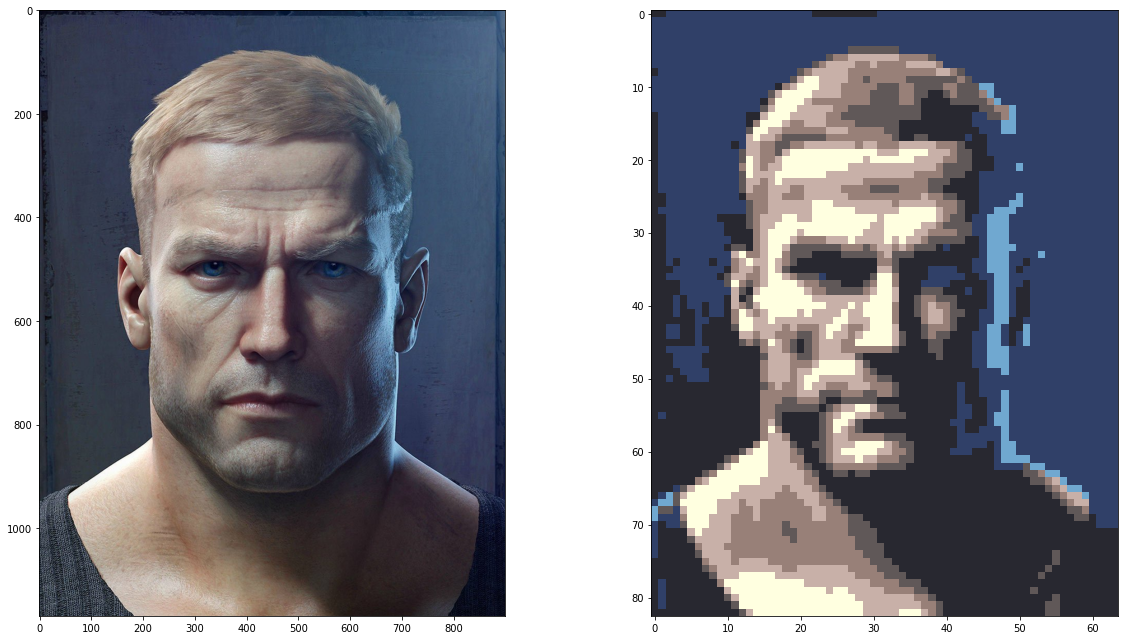

In [4]:
# load image with 'skimage.io.imread()'
image = io.imread("examples/blazkowicz.jpg")  

downsample_by = 14  # new image will be 1/14th of the original in size
palette = 7  # find 7 colors

# 1) Instantiate Pyx transformer
pyx = Pyx(factor=downsample_by, palette=palette)

# 2) fit an image, allow Pyxelate to learn the color palette
pyx.fit(image)

# 3) transform image to pixel art using the learned color palette
new_image = pyx.transform(image)

# save new image with 'skimage.io.imsave()'
#io.imsave("examples/test.png", new_image)
plot([image, new_image], "p_blazkowicz.png")

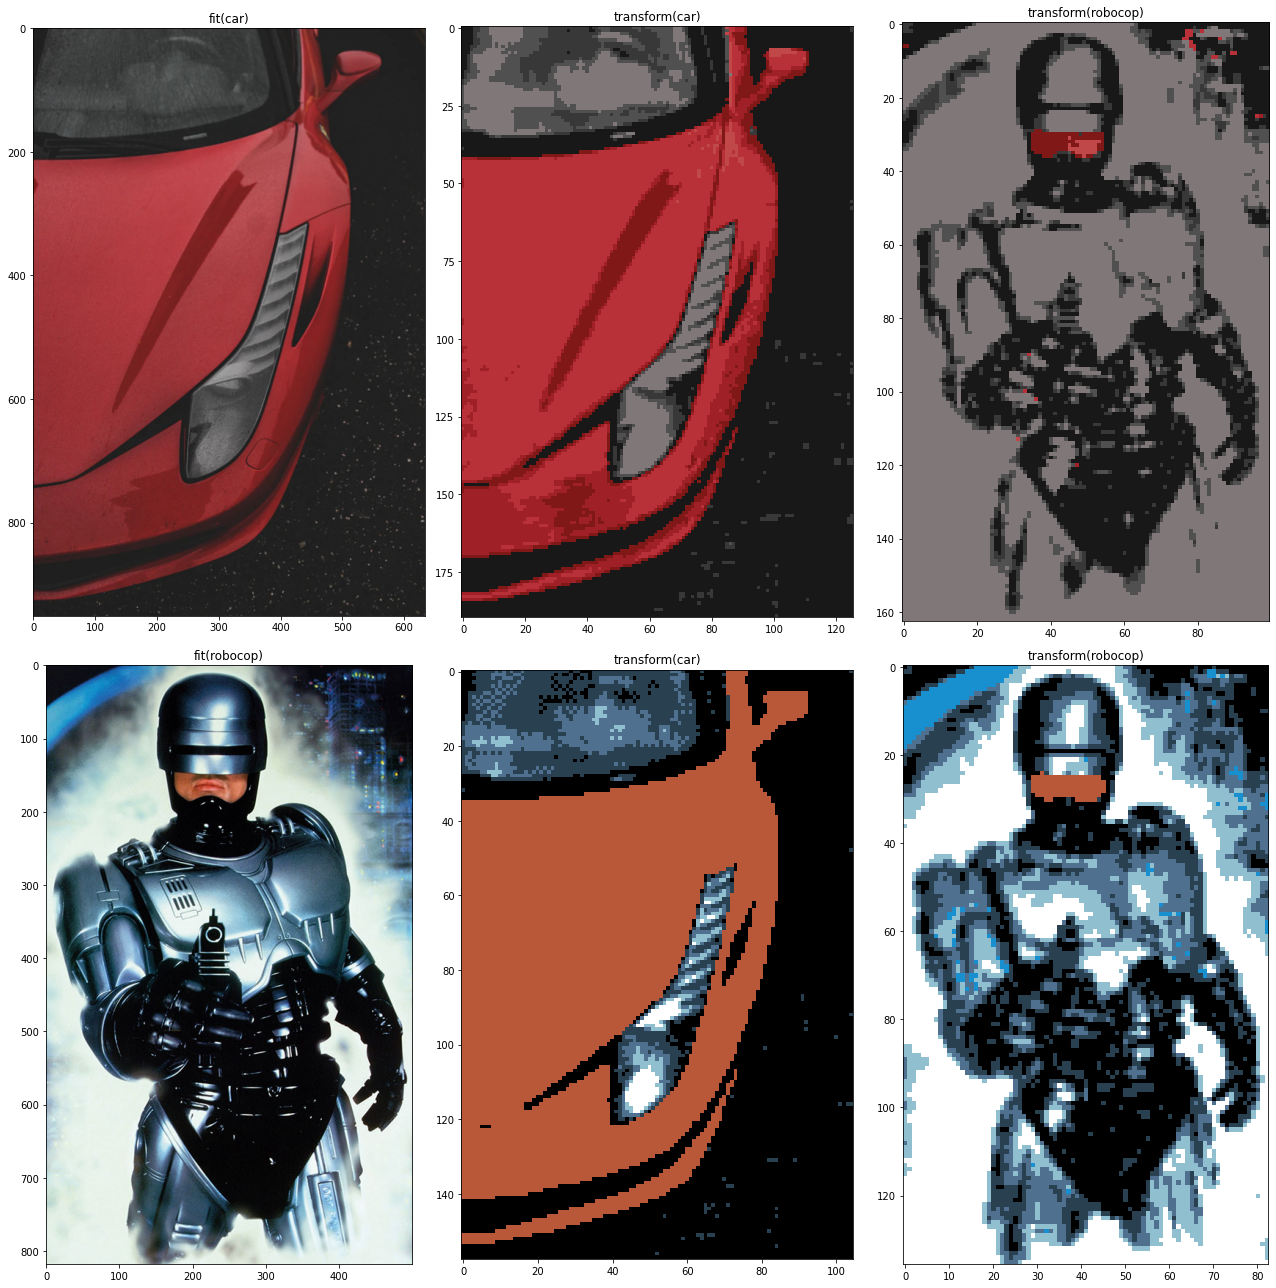

In [5]:
car = io.imread("examples/f1.jpg")
robocop = io.imread("examples/robocop.jpg")

# fit a model on each
pyx_car = Pyx(factor=5, palette=8, dither="none").fit(car)
pyx_robocop = Pyx(factor=6, palette=7, dither="naive", svd=True).fit(robocop)

plot([{"title":"fit(car)", "image":car},
      {"title":"transform(car)", "image":pyx_car.transform(car)},
      {"title":"transform(robocop)", "image":pyx_car.transform(robocop)},
      {"title":"fit(robocop)", "image":robocop},
      {"title":"transform(car)", "image":pyx_robocop.transform(car)},
      {"title":"transform(robocop)", "image":pyx_robocop.transform(robocop)},
     ], "p_fit_transform.png", fig_h=18)

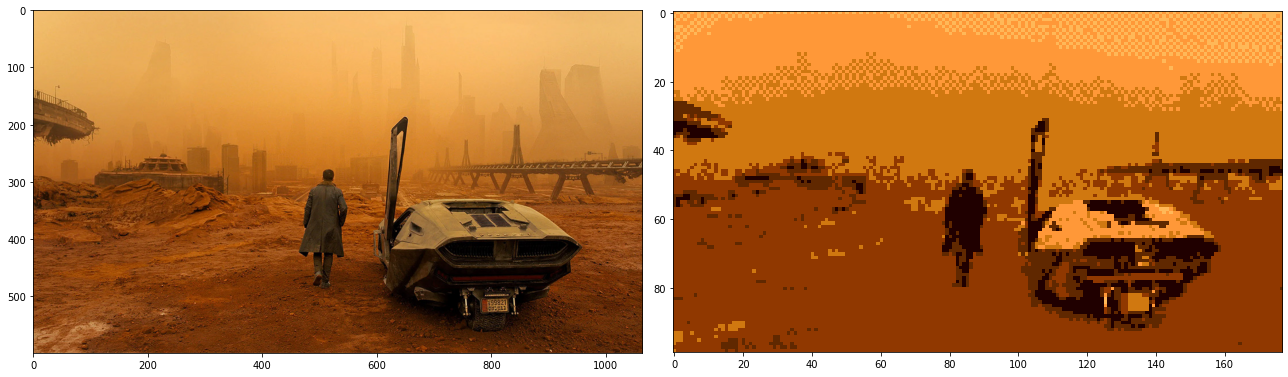

In [6]:
br = io.imread("examples/br.jpg")
br_p = Pyx(factor=6, palette=6, dither="naive").fit_transform(br)

plot([br, br_p], "p_br.png", 6)

D:\Munka\git\pyxelate\pyxelate\pyx.py:80: Warning: Pyxelate could not properly assign colors, try a different palette size for better results!
  warnings.warn("Pyxelate could not properly assign colors, try a different palette size for better results!", Warning)


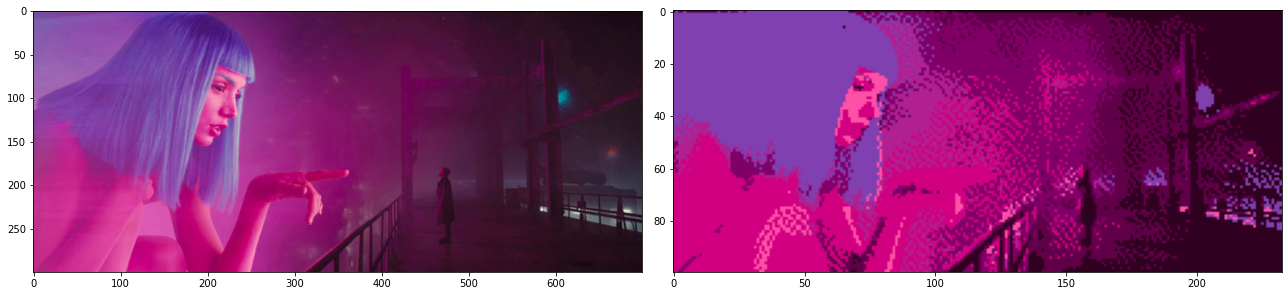

In [7]:
br2 = io.imread("examples/br2.jpg")
br2_p = Pyx(factor=3, palette=7, dither="atkinson").fit_transform(br2)

plot([br2, br2_p], "p_br2.png", 6)

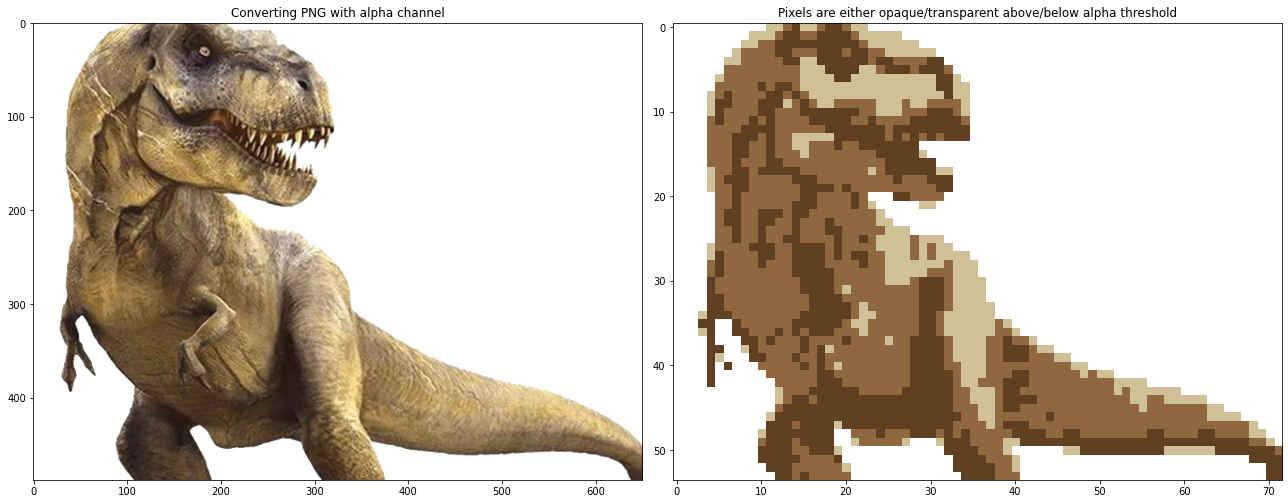

In [8]:
# fit() and transform() on image with alpha channel
trex = io.imread("examples/trex.png")
p_trex = Pyx(factor=9, palette=4, dither="naive", alpha=.6).fit_transform(trex)

plot([{"title":"Converting PNG with alpha channel", "image":trex},
      {"title":"Pixels are either opaque/transparent above/below alpha threshold", "image":p_trex}],
    "p_trex.png")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/elizabeththompson/Desktop/Junior_Year/Spring_2025/Automations_and_Workflows/projects/pyxelate/pyxelate/pyx.py:306: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  return skimage_median(channel, skimage_square(3))


NameError: name 'SAVE_IMAGES' is not defined

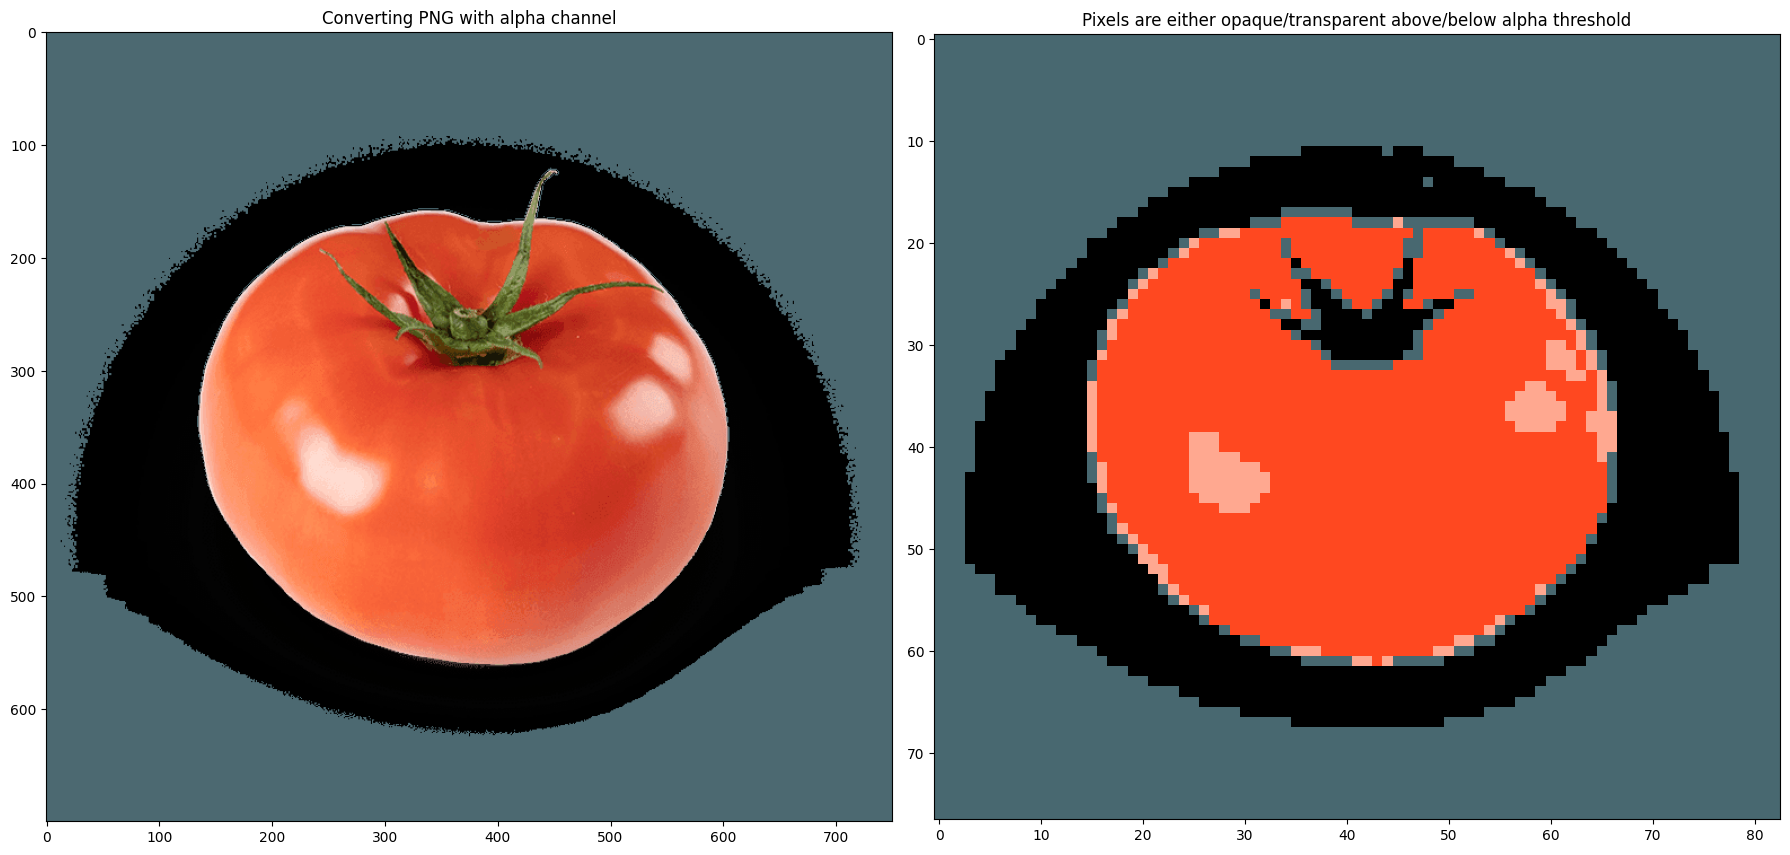

In [8]:
tomato = io.imread("tomato.png")
p_tomato = Pyx(factor=9, palette=4, dither="naive", alpha=1).fit_transform(tomato)

plot([{"title":"Converting PNG with alpha channel", "image":tomato},
      {"title":"Pixels are either opaque/transparent above/below alpha threshold", "image":p_tomato}],
    "p_tomato.png")

In [11]:
# this will be REALLY SLOW!!!

palm = io.imread("examples/palms3.jpg")
palm_none = Pyx(factor=4, palette=6, dither="none").fit_transform(palm)
palm_naive = Pyx(factor=4, palette=6, dither="naive").fit_transform(palm)
palm_bayer = Pyx(factor=4, palette=6, dither="bayer").fit_transform(palm)
palm_floyd = Pyx(factor=4, palette=6, dither="floyd").fit_transform(palm)
palm_atkinson = Pyx(factor=4, palette=6, dither="atkinson").fit_transform(palm)


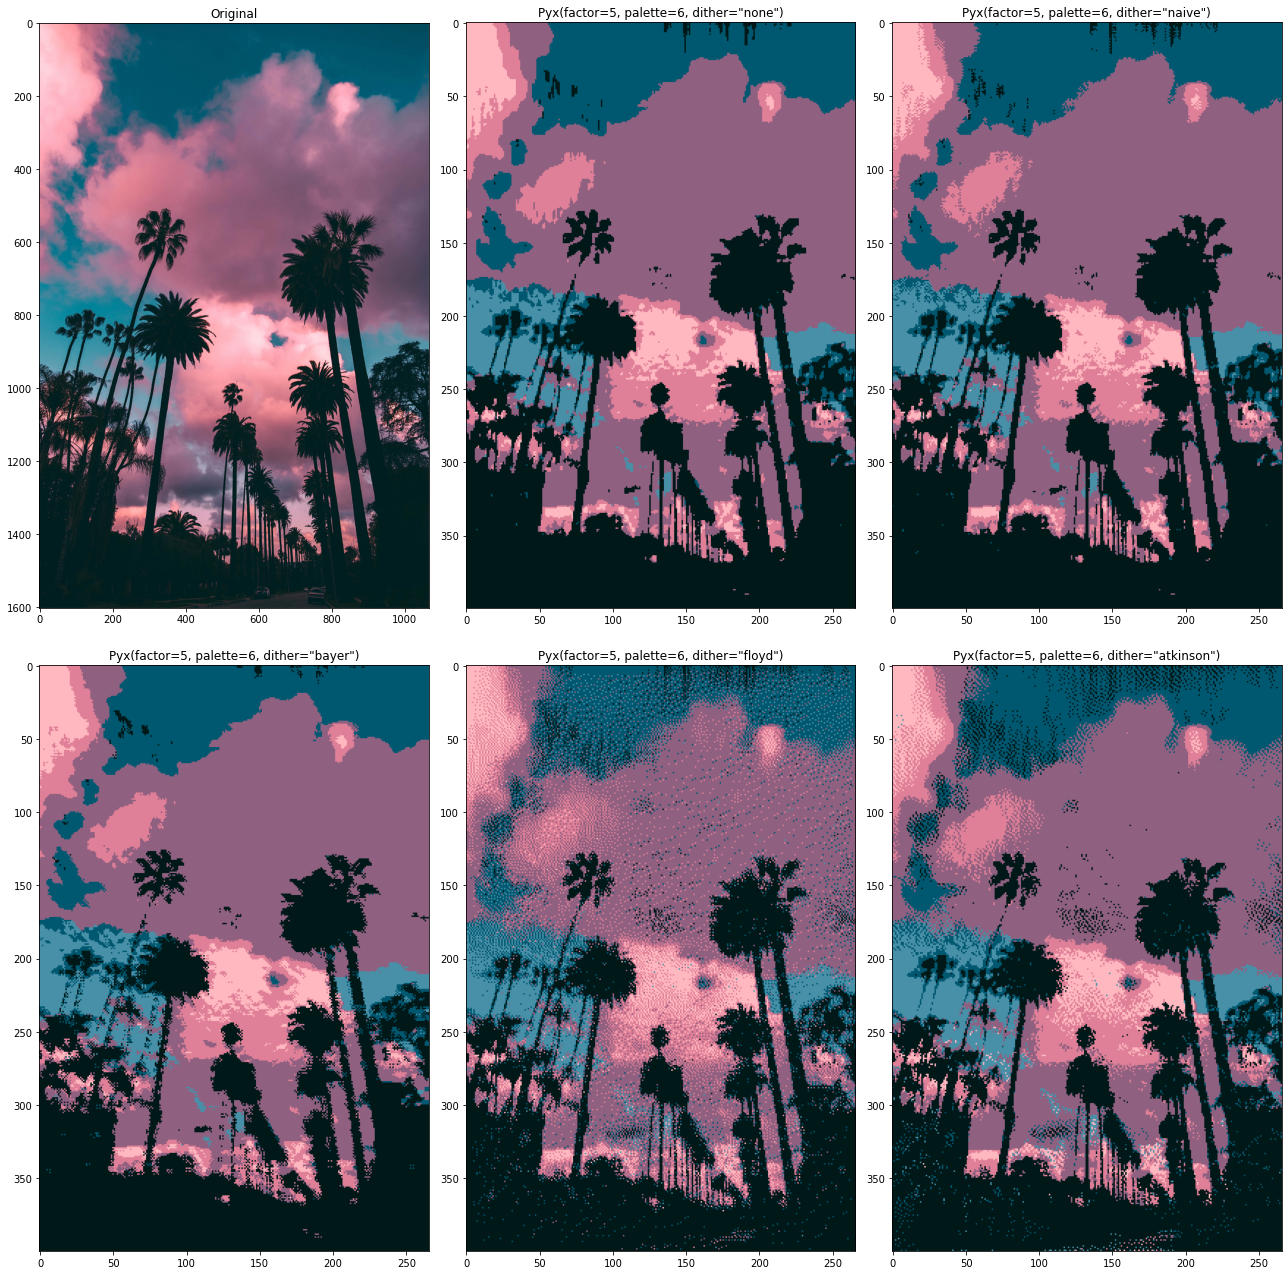

In [12]:
plot([
    {"title":'Original', "image":palm},
    {"title":'Pyx(factor=5, palette=6, dither="none")', "image":palm_none},
    {"title":'Pyx(factor=5, palette=6, dither="naive")', "image":palm_naive},
    {"title":'Pyx(factor=5, palette=6, dither="bayer")', "image":palm_bayer},
    {"title":'Pyx(factor=5, palette=6, dither="floyd")', "image":palm_floyd},
    {"title":'Pyx(factor=5, palette=6, dither="atkinson")', "image":palm_atkinson}
     ], 
    "p_palms.png", fig_h=18)

D:\Munka\git\pyxelate\pyxelate\pyx.py:80: Warning: Pyxelate could not properly assign colors, try a different palette size for better results!
  warnings.warn("Pyxelate could not properly assign colors, try a different palette size for better results!", Warning)


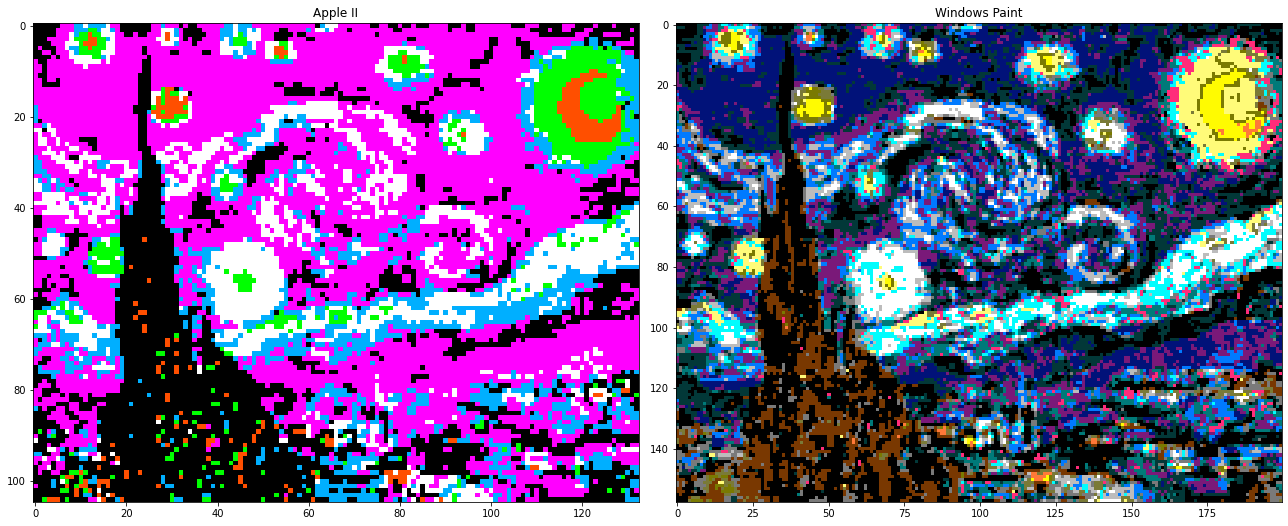

In [9]:
vangogh = io.imread("examples/vangogh.jpg")

vangogh_apple = Pyx(factor=12, palette=Pal.APPLE_II_HI, dither="atkinson").fit_transform(vangogh)
vangogh_mspaint = Pyx(factor=8, palette=Pal.MICROSOFT_WINDOWS_PAINT, dither="none").fit_transform(vangogh)

plot([{"title":"Apple II", "image":vangogh_apple},
      {"title":"Windows Paint", "image":vangogh_mspaint}],
      "p_vangogh.png")

In [14]:
# names of all palettes available
Pal.list()

['TELETEXT',
 'CGA_MODE4_PAL1',
 'CGA_MODE5_PAL1',
 'CGA_MODE4_PAL2',
 'ZX_SPECTRUM',
 'APPLE_II_LO',
 'APPLE_II_HI',
 'COMMODORE_64',
 'GAMEBOY_COMBO_UP',
 'GAMEBOY_COMBO_DOWN',
 'GAMEBOY_COMBO_LEFT',
 'GAMEBOY_COMBO_RIGHT',
 'GAMEBOY_A_UP',
 'GAMEBOY_A_DOWN',
 'GAMEBOY_A_LEFT',
 'GAMEBOY_A_RIGHT',
 'GAMEBOY_B_UP',
 'GAMEBOY_B_DOWN',
 'GAMEBOY_B_LEFT',
 'GAMEBOY_B_RIGHT',
 'GAMEBOY_ORIGINAL',
 'GAMEBOY_POCKET',
 'GAMEBOY_VIRTUALBOY',
 'MICROSOFT_WINDOWS_16',
 'MICROSOFT_WINDOWS_20',
 'MICROSOFT_WINDOWS_PAINT',
 'PICO_8',
 'MSX',
 'MONO_OBRADINN_IBM',
 'MONO_OBRADINN_MAC',
 'MONO_BJG',
 'MONO_BW',
 'MONO_PHOSPHOR_AMBER',
 'MONO_PHOSPHOR_LTAMBER',
 'MONO_PHOSPHOR_GREEN1',
 'MONO_PHOSPHOR_GREEN2',
 'MONO_PHOSPHOR_GREEN3',
 'MONO_PHOSPHOR_APPLE',
 'MONO_PHOSPHOR_APPLEC']

D:\Munka\git\pyxelate\pyxelate\pyx.py:80: Warning: Pyxelate could not properly assign colors, try a different palette size for better results!
  warnings.warn("Pyxelate could not properly assign colors, try a different palette size for better results!", Warning)


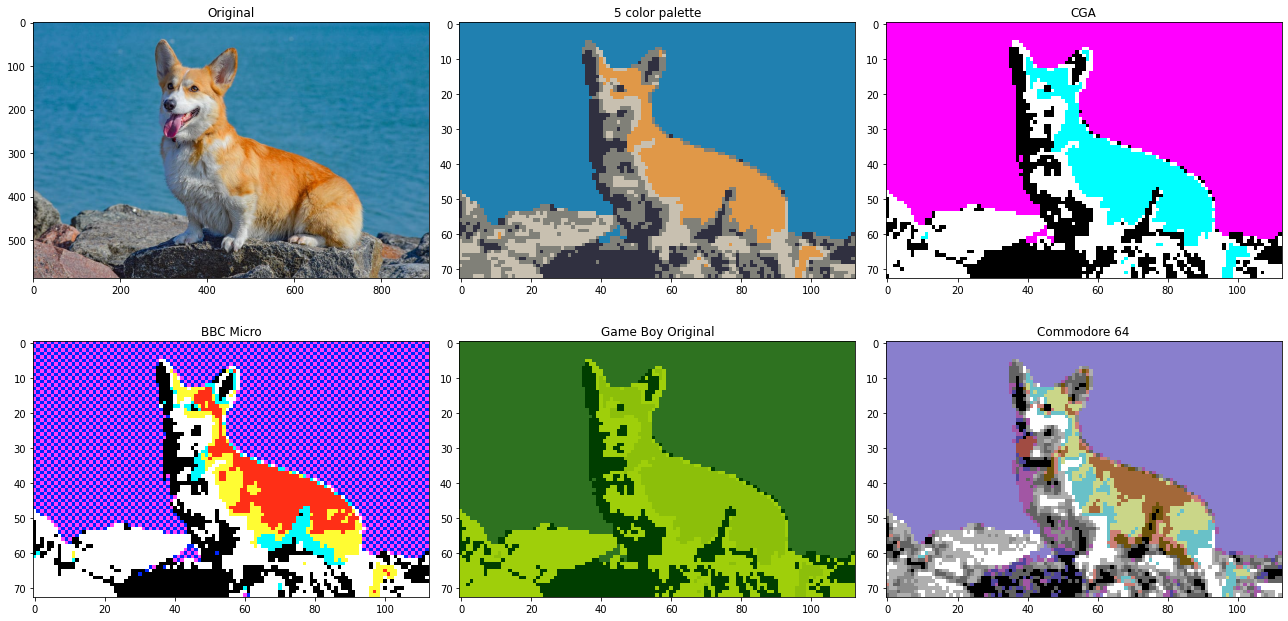

In [10]:
# original image
corgi = io.imread("examples/corgi.jpg")
# find 5 colors automatically
corgi_5 = Pyx(factor=8, palette=5, dither="none", svd=True).fit_transform(corgi)
# assign CGA palette
corgi_cga = Pyx(factor=8, palette=Pal.CGA_MODE4_PAL1, dither="naive", svd=True).fit_transform(corgi)

# assign BBC Micro palette
corgi_bbc = Pyx(factor=8, palette=Pal.ZX_SPECTRUM, dither="naive", svd=False).fit_transform(corgi)
# assign Game Boy palette
corgi_gb = Pyx(factor=8, palette=Pal.GAMEBOY_ORIGINAL, dither="none", svd=True).fit_transform(corgi)
# assign C64 palette
corgi_c64 = Pyx(factor=8, palette=Pal.COMMODORE_64, dither="naive", svd=True).fit_transform(corgi)

plot([{"title": "Original", "image": corgi},
      {"title": "5 color palette", "image": corgi_5},
      {"title": "CGA", "image": corgi_cga},
      {"title": "BBC Micro", "image": corgi_bbc},
      {"title": "Game Boy Original", "image": corgi_gb},
      {"title": "Commodore 64", "image": corgi_c64}],
      "p_corgi.png")